# Chicago Speeding Traffic Cameras

## Exploratory Data Analysis 

Data from Kaggle:
https://www.kaggle.com/chicago/chicago-red-light-and-speed-camera-data#speed-camera-violations.csv

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Load in data frames
df = pd.read_csv('speed-camera-violations.csv')
# This dataframe has first date that camera came on line
locations = pd.read_csv('speed-camera-locations.csv')

# Change the column labels to lowercase and replace spaces with underscores
# Change date column datatype to datetime
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
df['violation_date'] = pd.to_datetime(df['violation_date'])
df.drop(columns=['x_coordinate', 'y_coordinate', 'latitude', 'longitude', 'location'], inplace=True)
df.head()

,address,camera_id,violation_date,violations
0,7738 S WESTERN,CHI065,2014-07-08,65
1,1111 N HUMBOLDT,CHI010,2014-07-16,56
2,5520 S WESTERN,CHI069,2014-07-08,10
3,1111 N HUMBOLDT,CHI010,2014-07-26,101
4,5529 S WESTERN,CHI068,2014-08-03,20


In [3]:
# Format the locations columns
locations.columns = locations.columns.str.lower()
locations.columns = locations.columns.str.replace(' ', '_')
locations['go-live_date'] = pd.to_datetime(locations['go-live_date'])
print(locations.head())

                           address first_approach second_approach  \
0      3843 W 111th (Speed Camera)             EB              WB   
1  19 W Chicago Ave (Speed Camera)             WB             NaN   
2    2445 W 51st St (Speed Camera)             EB             NaN   
3    7739 S Western (Speed Camera)             NB             NaN   
4    3832 W 79th St (Speed Camera)             EB             NaN   

  go-live_date   latitude  longitude  \
0   2014-01-13  41.691202 -87.717211   
1   2014-04-29  41.896556 -87.629026   
2   2014-02-24  41.801013 -87.686071   
3   2013-12-18  41.752629 -87.682765   
4   2014-02-10  41.749715 -87.719599   

                                            location  
0  {'latitude': '41.69120239624487', 'longitude':...  
1  {'latitude': '41.89655610710888', 'longitude':...  
2  {'latitude': '41.801012880525555', 'longitude'...  
3  {'latitude': '41.752629293489285', 'longitude'...  
4  {'latitude': '41.749715176851936', 'longitude'...  


In [4]:
# Split out the location address into two columns and remove the extra one
locations['address1'], locations['address2'] = locations['address'].str.split(' \(', 1).str
locations.drop(columns=['first_approach', 'second_approach', 'address', 'address2', 'location'], inplace=True)
print(locations.head())

  go-live_date   latitude  longitude          address1
0   2014-01-13  41.691202 -87.717211      3843 W 111th
1   2014-04-29  41.896556 -87.629026  19 W Chicago Ave
2   2014-02-24  41.801013 -87.686071    2445 W 51st St
3   2013-12-18  41.752629 -87.682765    7739 S Western
4   2014-02-10  41.749715 -87.719599    3832 W 79th St


In [5]:
# convert both address columns to lowercase before merging
df['address'] = df['address'].str.lower()
locations['address1'] = locations['address1'].str.lower()

# Merge locations into the dataframe
df = pd.merge(df, locations, left_on='address', right_on='address1', how='left')

# The day of the week with Monday=0, Sunday=6
df['violation_wkday'] = df['violation_date'].dt.dayofweek

# Frop the extra address columns
df.drop(columns=['address1'], inplace=True)
print(df.head())

           address camera_id violation_date  violations go-live_date  \
0   7738 s western    CHI065     2014-07-08          65   2013-12-18   
1  1111 n humboldt    CHI010     2014-07-16          56          NaT   
2   5520 s western    CHI069     2014-07-08          10   2013-11-23   
3  1111 n humboldt    CHI010     2014-07-26         101          NaT   
4   5529 s western    CHI068     2014-08-03          20   2013-11-23   

    latitude  longitude  violation_wkday  
0  41.752719 -87.683061                1  
1        NaN        NaN                2  
2  41.792761 -87.684157                1  
3        NaN        NaN                5  
4  41.792522 -87.683857                6  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159404 entries, 0 to 159403
Data columns (total 8 columns):
address            159404 non-null object
camera_id          159404 non-null object
violation_date     159404 non-null datetime64[ns]
violations         159404 non-null int64
go-live_date       112780 non-null datetime64[ns]
latitude           112780 non-null float64
longitude          112780 non-null float64
violation_wkday    159404 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 10.9+ MB


In [7]:
df['address'] = df['address'].str.lower()
df['address'].value_counts().head()

536 e morgan dr          1536
1315 w garfield blvd     1536
2080 w pershing          1536
5520 s western           1536
6226 w irving park rd    1536
Name: address, dtype: int64

In [8]:
df['camera_id'].value_counts().head()

CHI029    1536
CHI005    1536
CHI121    1536
CHI069    1536
CHI083    1536
Name: camera_id, dtype: int64

In [9]:
# Cameras were implemented on different dates, let's limit this to the latest year
# Also make sure that the cameras all came online before this current year
df_2018 = df[(df['violation_date'] >= '2018-01-01') & (df['go-live_date'] <= '2018-01-01')]

In [10]:
# See how many violations there are per camera
camera_group = df_2018.groupby(by='camera_id').violations.sum().reset_index()


top10_cameras = camera_group.sort_values('violations', ascending=False).head(10)
print(top10_cameras)

   camera_id  violations
89    CHI149       35006
65    CHI120       29064
0     CHI003       27179
40    CHI079       24876
8     CHI029       23058
24    CHI058       18086
49    CHI095       17585
85    CHI144       15658
88    CHI147       13782
1     CHI019       10356


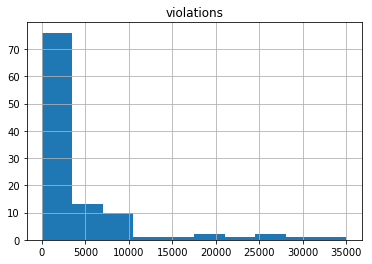

In [11]:
camera_group.hist('violations', bins=10)
plt.show()

Most cameras less than 5,000 violations over the time period.  

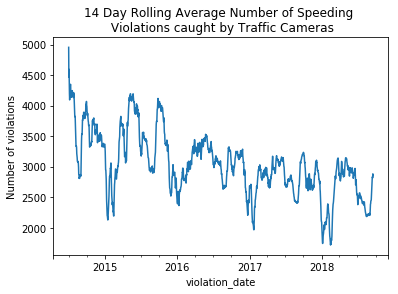

In [12]:
all_dates = df.groupby('violation_date').violations.sum()
all_dates_roll = all_dates.rolling('14d').mean()
all_dates_roll.plot()
plt.title('14 Day Rolling Average Number of Speeding \n Violations caught by Traffic Cameras')
plt.ylabel('Number of violations')
plt.show()

We can see that there appear to be fewer traffic violations in winter. It also appears that the overall trend has been for fewer traffic violations over time.  This means that any comparison we do should be comparing against current camera violations, and not necessarily to past data.

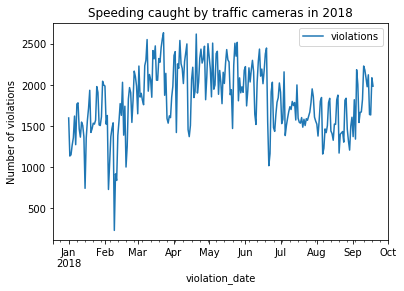

In [13]:
# Looking just at 2018 data
date_group = df_2018.groupby('violation_date').violations.sum().reset_index()
date_group['violation_wkday'] = date_group['violation_date'].dt.dayofweek

date_group.plot('violation_date', 'violations')
plt.title('Speeding caught by traffic cameras in 2018')
plt.ylabel('Number of violations')
plt.show()

[]

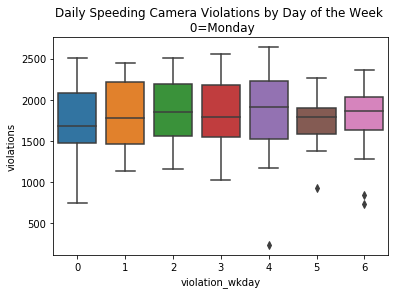

In [14]:
# How does it vary by day of the week

ax = sns.boxplot(x='violation_wkday', y='violations', data=date_group)
plt.title('Daily Speeding Camera Violations by Day of the Week \n 0=Monday')
plt.plot()

Looks like there is some variation by day of the week as well.

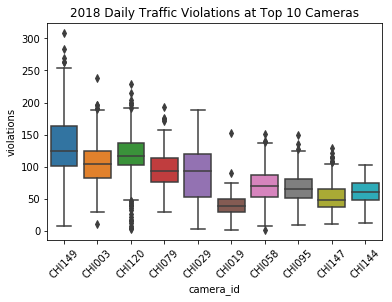

In [15]:
df_2018_top10 = df_2018[df_2018.camera_id.isin(top10_cameras.camera_id)].sort_values('violations', ascending=False)
ax = sns.boxplot(x='camera_id', y='violations', data=df_2018_top10)
plt.xticks(rotation=45)
plt.title('2018 Daily Traffic Violations at Top 10 Cameras')
plt.show()

Definitely variation by camera as well.

## The Problem
How to decrease the number of speeding traffic violations in Chicago? Speeding creates unsafe streets, and makes it hard for drivers to see pedestrians in time to stop.   

## The Potential Solution 
Adding a neon pink sign warning about the presence of traffic cameras will decrease speeding.

## Method of Testing the Solution
Install neon pink traffic camera warning signs in front of half of the traffic cameras.  This is an A/B manipulation where the signs are installed or not installed.  The variable of interest is number of speeding violations in areas with extra notice of speeding cameras and areas without the extra signage.  

Over the course of two months, tally the number of speeding violations in the areas with signage and without signage. Start the testing in the summer, since winter months have lower traffic violations.  If the rate of speeding violations per week decreases in the areas with extra signage compared to the areas without the extra signage, perform a ttest and determine if the difference is significant with a p-value less than 0.05.  If the difference is significant, install the camera warning signs at all locations.  If it is not significant, but there is a difference, keep the signs up for an additional two months and check again. If the p-value is still greater than 0.05, remove all signs.    

#### Preventing Bias:
##### Sampling Bias
The cameras should be randomnly assigned to the two groups.  In addition, the mean number of speeding violations per week and the distributions of the speeding violations should be compared and if they are not similar, the groups should be redistributed.

##### Contextual Bias
Check if any special events are occuring in any geographic region with cameras during the test. For example, a sporting event may bring extra cars to an area that are not usually there.  This could affect the results.  If there is a special event in the region of some of the cameras, remove those cameras and some equivalent cameras from the other group from the study for the duration of the event.

##### Other Measured Variables:
Weather - during extreme weather people tend to drive slower and have fewer speeding violations.
Number of accidents at intersections - if there are more accidents at the intersections with signs because people are distracted by them or are suddenly slowing to avoid a fine, the signs should be removed even if the rate of violations has decreased.

Checking Normality for T-test Usage

In [16]:
# Making a standard normally distributed variable with 1000 observations,
# a mean of 0, and standard deviation of 1 that we will use as our “comparison.”
norm = np.random.normal(0, 1, 159404)

# Sorting the values in ascending order.
norm.sort()

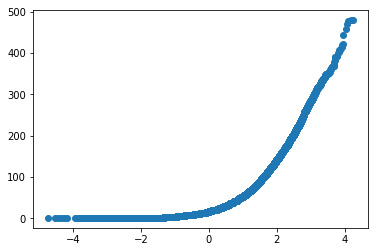

In [17]:
# Plotting the variable against norm in qqplots.
plt.plot(norm, df['violations'].sort_values(), "o") 
plt.show() 

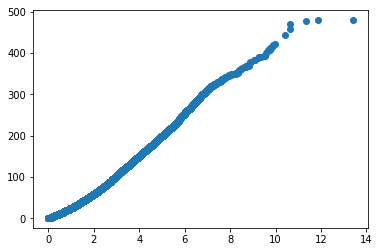

In [18]:
expon = np.random.exponential(1, 159404)
expon.sort()

plt.plot(expon, df['violations'].sort_values(), 'o')

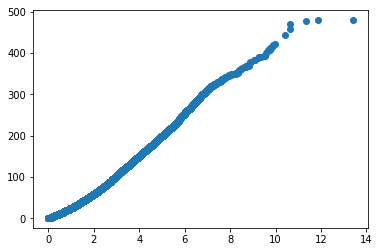

In [19]:
poisson = np.random.poisson(1, 159404)
poisson.sort()


plt.plot(expon, df['violations'].sort_values(), 'o')

In [20]:
norm_check = df_2018.groupby('violation_date').violations.mean().reset_index()

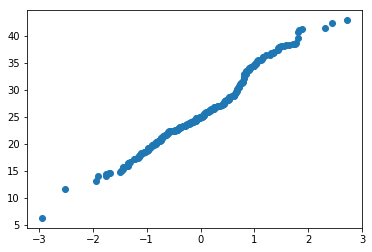

In [21]:
# Making a standard normally distributed variable with 1000 observations,
# a mean of 0, and standard deviation of 1 that we will use as our “comparison.”
norm2 = np.random.normal(0, 1, 261)

# Sorting the values in ascending order.
norm2.sort()

# Plotting the variable against norm in qqplots.
plt.plot(norm2, norm_check['violations'].sort_values(), "o") 
plt.show() 